<a href="https://colab.research.google.com/github/sofpast/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Nov  6 02:15:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() is True else "cpu"
device

2.1.0+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
# camera apps, modern cars, and manufacturers

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
# Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
# Two of main to fix overfitting include:
# 1. Using a smaller or different model
# 2. Using a larger dataset

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
import torch.nn as nn
m = nn.Softmax(dim=1)
input = torch.randn(1, 4)
print(input)

tensor([[-0.2057, -1.2812,  1.6713, -0.4927]])


In [7]:
output = m(input)
output

tensor([[0.1159, 0.0395, 0.7575, 0.0870]])

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [8]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(f"PyTorch version: {torch.__version__}\ntorchvision: {torchvision.__version__}")


PyTorch version: 2.1.0+cu118
torchvision: 0.16.0+cu118


In [9]:
# Training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:00<00:00, 118325480.63it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4909183.59it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 62643592.34it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21635548.09it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [10]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [11]:
print(image.shape)
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))
class_names = train_data.classes
print(class_names)

torch.Size([1, 28, 28])
60000 60000 10000 10000
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 6. Visualize at least 5 different samples of the MNIST training dataset.

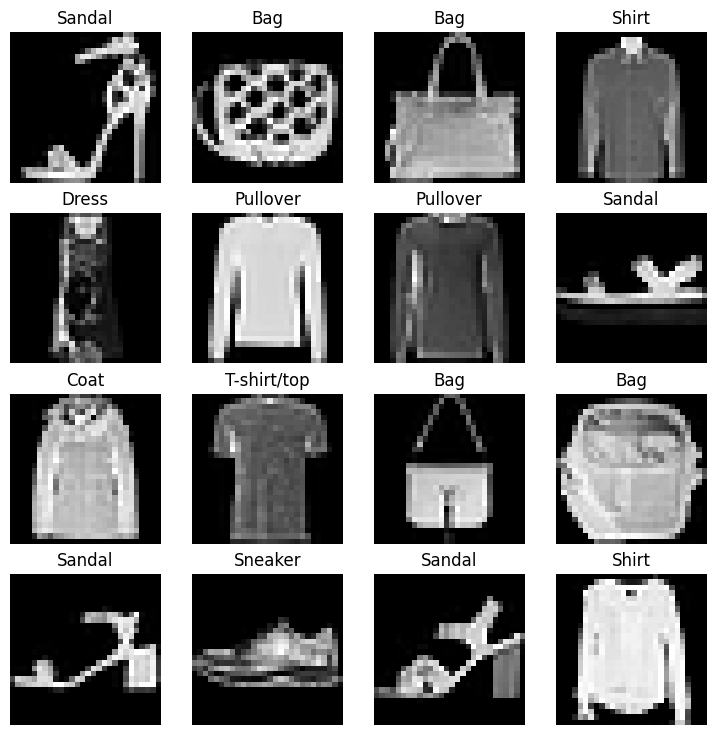

In [12]:
# Plot image
torch.manual_seed(23)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b37bc018c40>, <torch.utils.data.dataloader.DataLoader object at 0x7b37bc018250>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2
        )
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7,
            out_features=output_shape
        )
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2




FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
# Import accuracy metric
from helper_functions import accuracy_fn

In [17]:
# train_step
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.to(device)

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                            y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.5f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)
                              )
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f} %")



In [18]:
# training model

torch.manual_seed(42)

from timeit import default_timer as timer
from tqdm import tqdm
start_time = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(data_loader=train_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn
             )
  test_step(
      data_loader=test_dataloader,
      model=model_2,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )

end_time = timer()

print(f"Training time: {end_time - start_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 0.59227 | Train accuracy: 78.52500%
Test loss: 0.00184 | Test Accuracy: 0.25958 %
Test loss: 0.00156 | Test Accuracy: 0.24045 %
Test loss: 0.00094 | Test Accuracy: 0.28032 %
Test loss: 0.00063 | Test Accuracy: 0.30042 %
Test loss: 0.00127 | Test Accuracy: 0.28051 %
Test loss: 0.00048 | Test Accuracy: 0.31040 %
Test loss: 0.00049 | Test Accuracy: 0.32048 %
Test loss: 0.00146 | Test Accuracy: 0.26061 %
Test loss: 0.00080 | Test Accuracy: 0.29037 %
Test loss: 0.00089 | Test Accuracy: 0.29046 %
Test loss: 0.00092 | Test Accuracy: 0.29046 %
Test loss: 0.00130 | Test Accuracy: 0.27050 %
Test loss: 0.00117 | Test Accuracy: 0.29040 %
Test loss: 0.00106 | Test Accuracy: 0.29046 %
Test loss: 0.00161 | Test Accuracy: 0.27050 %
Test loss: 0.00103 | Test Accuracy: 0.29040 %
Test loss: 0.00080 | Test Accuracy: 0.29046 %
Test loss: 0.00122 | Test Accuracy: 0.26051 %
Test loss: 0.00108 | Test Accuracy: 0.27040 %
Test loss: 0.00167 | Test Accuracy: 0.25046 %
Test loss:

 20%|██        | 1/5 [00:21<01:25, 21.50s/it]

Test loss: 0.00141 | Test Accuracy: 0.27043 %
Test loss: 0.00159 | Test Accuracy: 0.27043 %
Test loss: 0.00132 | Test Accuracy: 0.27043 %
Test loss: 0.00113 | Test Accuracy: 0.29040 %
Test loss: 0.00167 | Test Accuracy: 0.22058 %
Test loss: 0.00102 | Test Accuracy: 0.27027 %
Test loss: 0.00040 | Test Accuracy: 0.31037 %
Test loss: 0.00143 | Test Accuracy: 0.27056 %
Test loss: 0.00181 | Test Accuracy: 0.27043 %
Test loss: 0.00099 | Test Accuracy: 0.27043 %
Test loss: 0.00149 | Test Accuracy: 0.27043 %
Test loss: 0.00167 | Test Accuracy: 0.27043 %
Test loss: 0.00102 | Test Accuracy: 0.27043 %
Test loss: 0.00118 | Test Accuracy: 0.28042 %
Test loss: 0.00165 | Test Accuracy: 0.26048 %
Test loss: 0.00062 | Test Accuracy: 0.30035 %
Test loss: 0.00085 | Test Accuracy: 0.29050 %
Test loss: 0.00096 | Test Accuracy: 0.27050 %
Test loss: 0.00075 | Test Accuracy: 0.29040 %
Test loss: 0.00056 | Test Accuracy: 0.30045 %
Test loss: 0.00152 | Test Accuracy: 0.28051 %
Test loss: 0.00121 | Test Accuracy

 40%|████      | 2/5 [00:33<00:47, 15.77s/it]

Test loss: 0.00078 | Test Accuracy: 0.30045 %
Test loss: 0.00130 | Test Accuracy: 0.27053 %
Test loss: 0.00124 | Test Accuracy: 0.29040 %
Test loss: 0.00151 | Test Accuracy: 0.27050 %
Test loss: 0.00127 | Test Accuracy: 0.26045 %
Test loss: 0.00089 | Test Accuracy: 0.29037 %
Test loss: 0.00130 | Test Accuracy: 0.28048 %
Test loss: 0.00160 | Test Accuracy: 0.26048 %
Test loss: 0.00125 | Test Accuracy: 0.24045 %
Test loss: 0.00101 | Test Accuracy: 0.28032 %
Test loss: 0.00141 | Test Accuracy: 0.25050 %
Test loss: 0.00077 | Test Accuracy: 0.29034 %
Test loss: 0.00035 | Test Accuracy: 0.31043 %
Test loss: 0.00109 | Test Accuracy: 0.28054 %
Test loss: 0.00174 | Test Accuracy: 0.27046 %
Test loss: 0.00103 | Test Accuracy: 0.30038 %
Test loss: 0.00116 | Test Accuracy: 0.29050 %
Test loss: 0.00151 | Test Accuracy: 0.28048 %
Test loss: 0.00098 | Test Accuracy: 0.28045 %
Test loss: 0.00088 | Test Accuracy: 0.30042 %
Test loss: 0.00116 | Test Accuracy: 0.25056 %
Test loss: 0.00084 | Test Accuracy

 60%|██████    | 3/5 [00:45<00:27, 13.93s/it]

Test loss: 0.00098 | Test Accuracy: 0.29046 %
Test loss: 0.00185 | Test Accuracy: 0.27050 %
Test loss: 0.00085 | Test Accuracy: 0.28042 %
Test loss: 0.00077 | Test Accuracy: 0.29043 %
Test loss: 0.00113 | Test Accuracy: 0.27050 %
Test loss: 0.00042 | Test Accuracy: 0.30038 %
Test loss: 0.00031 | Test Accuracy: 0.30048 %
Test loss: 0.00111 | Test Accuracy: 0.27053 %
Test loss: 0.00169 | Test Accuracy: 0.28042 %
Test loss: 0.00075 | Test Accuracy: 0.30042 %
Test loss: 0.00104 | Test Accuracy: 0.28051 %
Test loss: 0.00166 | Test Accuracy: 0.27046 %
Test loss: 0.00099 | Test Accuracy: 0.28042 %
Test loss: 0.00090 | Test Accuracy: 0.28045 %
Test loss: 0.00092 | Test Accuracy: 0.29043 %
Test loss: 0.00058 | Test Accuracy: 0.29046 %
Test loss: 0.00094 | Test Accuracy: 0.29046 %
Test loss: 0.00051 | Test Accuracy: 0.30045 %
Test loss: 0.00053 | Test Accuracy: 0.30048 %
Test loss: 0.00059 | Test Accuracy: 0.30048 %
Test loss: 0.00135 | Test Accuracy: 0.29050 %
Test loss: 0.00079 | Test Accuracy

 80%|████████  | 4/5 [00:56<00:13, 13.10s/it]

Test loss: 0.00030 | Test Accuracy: 0.32035 %
Test loss: 0.00100 | Test Accuracy: 0.30054 %
Test loss: 0.00079 | Test Accuracy: 0.29050 %
Test loss: 0.00139 | Test Accuracy: 0.26051 %
Test loss: 0.00107 | Test Accuracy: 0.28039 %
Test loss: 0.00148 | Test Accuracy: 0.28045 %
Test loss: 0.00120 | Test Accuracy: 0.27046 %
Test loss: 0.00071 | Test Accuracy: 0.29040 %
Test loss: 0.00096 | Test Accuracy: 0.29046 %
Test loss: 0.00192 | Test Accuracy: 0.26051 %
Test loss: 0.00072 | Test Accuracy: 0.28039 %
Test loss: 0.00096 | Test Accuracy: 0.28045 %
Test loss: 0.00105 | Test Accuracy: 0.26048 %
Test loss: 0.00059 | Test Accuracy: 0.29037 %
Test loss: 0.00024 | Test Accuracy: 0.32042 %
Test loss: 0.00103 | Test Accuracy: 0.28058 %
Test loss: 0.00191 | Test Accuracy: 0.25050 %
Test loss: 0.00078 | Test Accuracy: 0.30032 %
Test loss: 0.00141 | Test Accuracy: 0.27053 %
Test loss: 0.00160 | Test Accuracy: 0.26045 %
Test loss: 0.00092 | Test Accuracy: 0.28038 %
Test loss: 0.00075 | Test Accuracy

100%|██████████| 5/5 [01:08<00:00, 13.73s/it]

Test loss: 0.00168 | Test Accuracy: 0.28042 %
Test loss: 0.00077 | Test Accuracy: 0.27046 %
Test loss: 0.00081 | Test Accuracy: 0.28042 %
Test loss: 0.00121 | Test Accuracy: 0.25050 %
Test loss: 0.00049 | Test Accuracy: 0.31031 %
Test loss: 0.00020 | Test Accuracy: 0.32048 %
Test loss: 0.00073 | Test Accuracy: 0.31053 %
Test loss: 0.00154 | Test Accuracy: 0.28054 %
Test loss: 0.00064 | Test Accuracy: 0.30042 %
Test loss: 0.00106 | Test Accuracy: 0.27053 %
Test loss: 0.00148 | Test Accuracy: 0.25046 %
Test loss: 0.00091 | Test Accuracy: 0.28035 %
Test loss: 0.00084 | Test Accuracy: 0.29043 %
Test loss: 0.00094 | Test Accuracy: 0.28048 %
Test loss: 0.00034 | Test Accuracy: 0.32038 %
Test loss: 0.00090 | Test Accuracy: 0.30054 %
Test loss: 0.00032 | Test Accuracy: 0.31046 %
Test loss: 0.00046 | Test Accuracy: 0.30051 %
Test loss: 0.00057 | Test Accuracy: 0.29050 %
Test loss: 0.00112 | Test Accuracy: 0.29046 %
Test loss: 0.00064 | Test Accuracy: 0.29046 %
Test loss: 0.00103 | Test Accuracy

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [19]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device):
  pred_probs = []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [20]:
# take 5 random samples
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=5):
  test_samples.append(sample)
  test_labels.append(label)

In [21]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [22]:
# make prediction on test samples
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs

tensor([[4.1850e-08, 2.7179e-09, 4.1933e-08, 7.0296e-10, 1.6202e-09, 9.9992e-01,
         1.9970e-08, 4.0545e-05, 3.1702e-05, 1.0647e-05],
        [1.4461e-01, 7.5155e-01, 1.1863e-02, 5.9172e-02, 7.2540e-03, 1.8338e-05,
         2.5255e-02, 8.1246e-05, 1.8228e-04, 2.2366e-05],
        [7.5565e-06, 2.4776e-08, 1.0380e-06, 7.8850e-08, 3.1943e-07, 1.3365e-03,
         1.6898e-06, 9.5012e-01, 3.9768e-04, 4.8131e-02],
        [8.0205e-04, 1.9338e-05, 3.6749e-01, 1.3018e-04, 6.2868e-01, 5.6441e-07,
         2.7963e-03, 7.3675e-07, 8.5094e-05, 7.7804e-07],
        [6.1569e-02, 9.2050e-06, 7.2785e-05, 9.2013e-01, 6.8223e-05, 1.9878e-07,
         1.8136e-02, 2.6887e-06, 8.6886e-06, 2.7837e-06]])

In [23]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3])

In [24]:
test_labels, pred_classes

([5, 1, 7, 4, 3], tensor([5, 1, 7, 4, 3]))

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

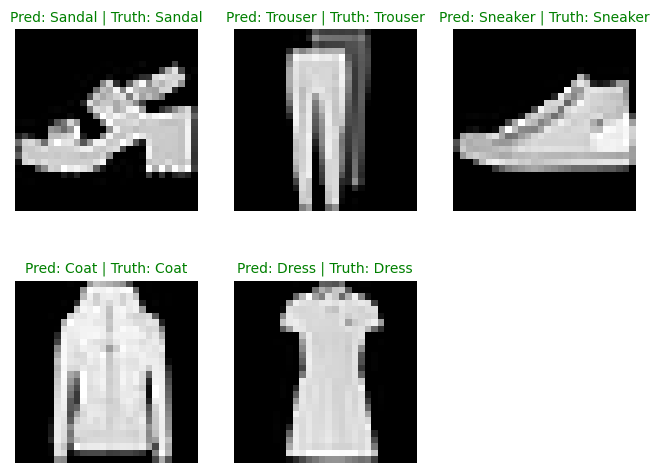

In [25]:
# Plot prediction
plt.figure(figsize=(8, 6))

nrows = 2
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [26]:
input = torch.randn([1, 3, 64, 64])
input

tensor([[[[-2.3169, -0.2168, -1.3847,  ...,  0.6039, -1.7223, -0.8278],
          [-0.4976,  0.4747, -2.5095,  ...,  1.6048, -2.4801, -0.4175],
          [-0.1933,  0.6526, -1.9006,  ...,  1.5080,  0.3094, -0.5003],
          ...,
          [ 1.3945,  1.1369,  1.1797,  ...,  0.3114, -0.5756,  0.3273],
          [ 0.5520, -0.7733, -2.4740,  ..., -1.5076, -0.4230, -0.4520],
          [-1.5838,  0.8040,  0.4396,  ..., -1.4912,  0.5385,  1.3362]],

         [[ 0.3451, -0.1033,  0.4315,  ...,  0.9802, -0.0586,  2.0731],
          [-1.8001,  1.4671, -0.1637,  ..., -1.5173,  0.2003, -0.2469],
          [ 0.1620,  0.3937, -0.5063,  ...,  0.6884,  1.6444, -0.0973],
          ...,
          [ 0.8699, -0.7617, -0.5187,  ...,  0.3781, -0.5251,  1.1868],
          [-0.9007, -0.5312,  0.0827,  ..., -0.3169, -1.6129, -0.9479],
          [-0.0292,  1.7699,  0.7444,  ...,  0.1274,  0.3783,  1.7934]],

         [[-0.0848,  1.2047,  0.7305,  ...,  0.4399,  0.6742, -0.5764],
          [ 1.7595,  1.9139, -

In [27]:
m = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=10, stride=1)

In [28]:
output = m(input)
output.shape
output

tensor([[[[ 0.6752,  0.4536,  0.0640,  ...,  1.1309, -0.1534,  0.3135],
          [ 0.1320, -0.5801, -0.6757,  ..., -0.0434,  0.3501,  0.0916],
          [-0.5185, -0.7795,  0.5238,  ...,  0.5380,  0.8560, -0.1908],
          ...,
          [ 0.1305, -0.3567,  0.1636,  ...,  0.0953,  0.0371,  0.1861],
          [-0.4568, -0.6180, -0.4055,  ..., -0.0121,  0.0372, -0.4766],
          [-0.4019, -0.3008, -0.0614,  ..., -0.8236,  0.0093,  0.3969]],

         [[ 0.2674,  0.1593,  0.9239,  ...,  0.5169, -0.5000,  0.1041],
          [-0.3300,  0.0753, -0.0866,  ..., -0.3341,  0.0888,  0.3141],
          [-0.7819, -0.3803, -0.5944,  ..., -0.4581,  0.5828,  0.5118],
          ...,
          [ 0.2741,  0.4363, -0.3660,  ...,  0.6477,  0.6917,  0.9487],
          [-0.5996, -0.0289,  0.2334,  ..., -0.7869, -0.3376,  0.1204],
          [ 0.6566, -0.2797,  0.2516,  ...,  0.8746, -0.3928,  0.2670]],

         [[ 0.2740,  0.5551,  0.5995,  ...,  0.6765, -0.4052, -0.0724],
          [ 0.5195,  0.5686, -

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [29]:
# Download MNIST dataset
from torchvision import datasets
from torchvision import transforms

mnist_train = datasets.MNIST(
    root=".",
    download=True,
    train=True,
    transform=transforms.ToTensor()
)

mnist_test = datasets.MNIST(
    root=".",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

len(mnist_train), len(mnist_test)

100%|██████████| 9912422/9912422 [00:00<00:00, 242227647.82it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 34267523.01it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 17180930.25it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6435989.45it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



(60000, 10000)

In [31]:
mnist_class_names = mnist_train.classes
mnist_class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [32]:
# Turn dataset into dataloaders
from torch.utils.data import DataLoader

mnist_train_dataloader = DataLoader(
    mnist_train,
    batch_size=32,
    shuffle=True
)

mnist_test_dataloader = DataLoader(
    mnist_test,
    batch_size=32,
    shuffle=False
)

len(mnist_train_dataloader), len(mnist_test_dataloader)


(1875, 313)

In [33]:
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [35]:
def make_prediction(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device):
  pred_probs = []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)



In [41]:
# take 5 random examples
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(mnist_test), k=5):
  test_samples.append(sample)
  test_labels.append(label)

len(test_samples), len(test_labels)

(5, 5)

In [42]:
# make prediction on test sample
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([0, 3, 5, 8, 8])

In [43]:
test_labels, pred_classes # the prediction is not good so we need to train it a little bit further

([2, 1, 2, 4, 6], tensor([0, 3, 5, 8, 8]))

In [44]:
# setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [50]:
# setup metrics
from tqdm.auto import tqdm
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
# Import accuracy metric
from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download


In [53]:
# setup training
epochs = 5

for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  # training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    #forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y_train, y_pred=y_pred.argmax(dim=1))

    # bacprop and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # adjust loss/ acc per epoch
  train_loss /= len(mnist_train_dataloader)
  train_acc /= len(mnist_train_dataloader)

  # Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      #forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss
      test_acc += accuracy_fn(y_true=y_test, y_pred=y_pred_test.argmax(dim=1))

    # adjust test loss
    test_loss /= len(mnist_test_dataloader)
    test_acc /= len(mnist_test_dataloader)

  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.3f}")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.140 | Train acc: 95.70 | Test loss: 32.935 | Test acc: 96.585
Epoch: 1 | Train loss: 0.109 | Train acc: 96.57 | Test loss: 28.035 | Test acc: 97.045
Epoch: 2 | Train loss: 0.092 | Train acc: 97.12 | Test loss: 24.267 | Test acc: 97.504
Epoch: 3 | Train loss: 0.081 | Train acc: 97.50 | Test loss: 21.155 | Test acc: 97.784
Epoch: 4 | Train loss: 0.073 | Train acc: 97.73 | Test loss: 20.014 | Test acc: 97.794


In [54]:
# make prediction on test sample
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6])

In [55]:
pred_classes, test_labels

(tensor([2, 1, 2, 4, 6]), [2, 1, 2, 4, 6])

In [58]:
# take testing samples
import random
random.seed(42)

test_samples = []
test_labels = []

# for sample, label in random.sample(list(mnist_test), k=5):
for sample, label in list(mnist_test):
  test_samples.append(sample)
  test_labels.append(label)

len(test_samples), len(test_labels)

(10000, 10000)

In [61]:
# make predictions on the whole test dataset
pred_probs = make_predictions(
    model=model_2,
    data=list(test_samples)
)
pred_labels = torch.argmax(pred_probs, dim=1)
pred_labels[2]

tensor(1)

In [62]:
import numpy as np

wrong_pred_indexes = np.where(pred_labels != mnist_test.targets)[0]
len(wrong_pred_indexes)

221

In [64]:
wrong_pred_indexes

array([ 115,  184,  321,  358,  445,  582,  684,  698,  707,  717,  726,
        740,  760,  829,  900,  924,  938,  939,  947,  965,  969, 1014,
       1062, 1112, 1114, 1181, 1182, 1226, 1247, 1270, 1299, 1319, 1326,
       1337, 1364, 1393, 1402, 1403, 1462, 1509, 1522, 1549, 1614, 1621,
       1671, 1681, 1717, 1722, 1737, 1754, 1772, 1878, 1901, 1956, 2018,
       2035, 2043, 2053, 2070, 2109, 2118, 2135, 2148, 2185, 2189, 2293,
       2369, 2387, 2406, 2422, 2447, 2454, 2462, 2488, 2526, 2597, 2607,
       2654, 2730, 2742, 2770, 2778, 2780, 2847, 2896, 2927, 2952, 2953,
       2990, 2995, 2998, 3005, 3012, 3060, 3073, 3130, 3206, 3225, 3288,
       3289, 3330, 3384, 3405, 3422, 3447, 3474, 3475, 3490, 3503, 3520,
       3533, 3534, 3597, 3599, 3662, 3718, 3726, 3762, 3767, 3778, 3780,
       3806, 3808, 3811, 3853, 3869, 3893, 3926, 3941, 3954, 4065, 4078,
       4102, 4194, 4205, 4224, 4248, 4256, 4265, 4289, 4374, 4382, 4500,
       4507, 4567, 4571, 4575, 4578, 4639, 4724, 47

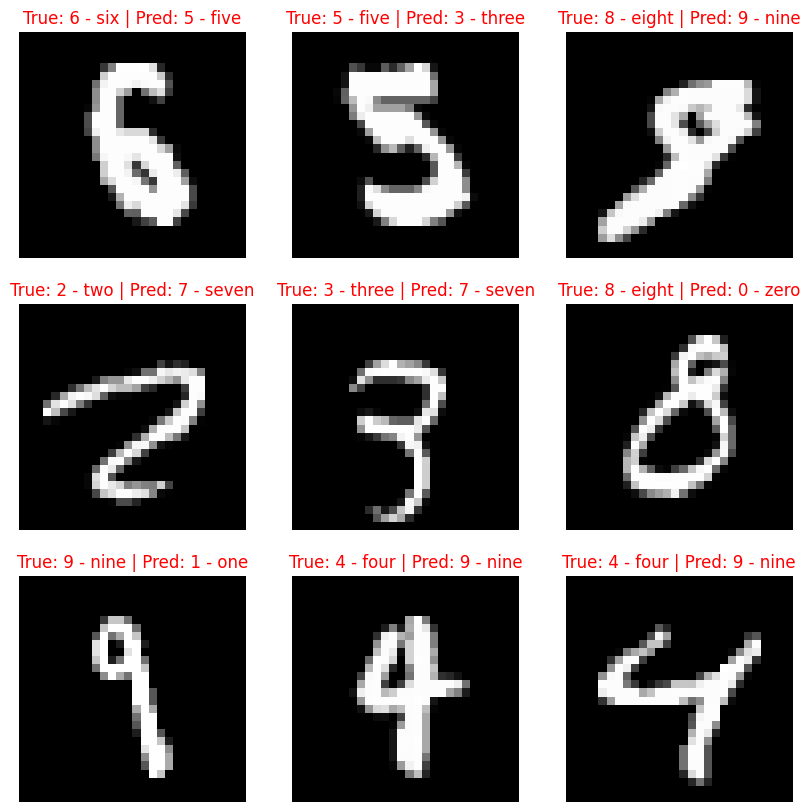

In [66]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = mnist_class_names[mnist_test[idx][1]]
  pred_label = mnist_class_names[pred_labels[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);